IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME10 : étude de cas


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

CARNIELLI Ariana

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Compléter le nom de ce notebook en rajoutant les noms des membres du binômes séparés par un tiret.

## Préparation


Décompresser l'archive, elle crée le répertoire <code>tme10</code> qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire <code>data</code> contenant la base d'apprentissage <code>countries-3i026.csv</code> utilisée dans cette séance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de unsupervised
from iads import Unsupervised as us

# importation de kmoyennes
from iads import kmoyennes as km

## Dataset: empreinte écologique des pays

Ce dataset est fourni dans le répertoire <code>data</code>: fichier <code>countries-3i026.csv</code>.

Le fichier fourni est extrait du fichier original qui peut être trouvé sur le site Kaggle:
https://www.kaggle.com/footprintnetwork/ecological-footprint/version/1



### Chargement des données

In [2]:
data_brut = pd.read_csv("data/countries-3i026.csv")
data_brut[0:5] 

,Country,Region,Population (millions),HDI,GDP/Capita,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Earths Required,Countries Required
0,Singapore,Asia-Pacific,5.300,0.91,53122.4,7.97,0.00,0.00,0.00,0.01,0.03,0.05,4.61,159.47
1,Israel,Middle East/Central Asia,7.640,0.89,33718.9,6.22,0.22,0.01,0.03,0.02,0.08,0.35,3.59,17.59
2,Kuwait,Middle East/Central Asia,3.250,0.82,41830.5,8.13,0.02,0.01,0.00,0.37,0.15,0.55,4.70,14.68
3,United Arab Emirates,Middle East/Central Asia,9.206,0.83,40817.4,7.93,0.02,0.00,0.07,0.47,0.00,0.56,4.58,14.16
4,Bahrain,Middle East/Central Asia,1.320,0.82,24299.0,7.49,0.01,0.00,0.00,0.46,0.10,0.58,4.33,12.96


Dans ce dataset, la variable <code>Country</code> sert d'identifiant pour chaque exemple.

### Examen et prétraitement de la base

<font size="+1" color="RED">**[Q]**</font> Afficher les valeurs minimales, maximales, moyennes, et médianes de chaque variable présentes dans le dataframe.

In [3]:
data_brut.describe()

,Population (millions),HDI,GDP/Capita,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Earths Required,Countries Required
count,149.000000,148.000000,149.000000,149.000000,145.000000,145.000000,145.000000,145.000000,145.000000,149.000000,149.000000,149.000000
mean,46.652121,0.686445,13899.390671,3.166443,0.584828,0.519655,1.146966,0.368897,0.072069,2.843691,1.828658,3.542081
std,156.861149,0.162288,19993.953499,2.214840,0.716057,1.090069,2.502135,0.722049,0.051315,3.941664,1.279397,13.203975
min,1.110000,0.340000,276.690000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.240000,0.080000
25%,4.800000,0.540000,1302.300000,1.370000,0.210000,0.050000,0.060000,0.020000,0.040000,0.710000,0.790000,0.780000
50%,10.880000,0.725000,5226.300000,2.340000,0.370000,0.150000,0.330000,0.080000,0.060000,1.320000,1.350000,1.660000
75%,32.520000,0.820000,14522.800000,4.610000,0.600000,0.360000,0.920000,0.300000,0.090000,2.800000,2.660000,2.520000
max,1408.040000,0.940000,100172.000000,10.800000,5.420000,8.230000,19.500000,4.760000,0.270000,26.310000,6.240000,159.470000


Avec le package <code>seaborn</code>, nous pouvons afficher les corrélations entre les variables.

Avant de pouvoir utiliser la fonction pairplot, il est nécessaire de remplacer les valeurs <code>NaN</code> présentes dans le dataframe par la valeur 0. Pour cela, on utilise la méthode <code>fillna</code>.

In [4]:
data = data_brut.fillna(0)

data.isnull().sum()

Country                       0
Region                        0
Population (millions)         0
HDI                           0
GDP/Capita                    0
Total Ecological Footprint    0
Cropland                      0
Grazing Land                  0
Forest Land                   0
Fishing Water                 0
Urban Land                    0
Total Biocapacity             0
Earths Required               0
Countries Required            0
dtype: int64

<font size="+1" color="RED">**[Q]**</font> Afficher la matrice des corrélations entre les variables (fonction <code>pairplot</code>) de ce dataset.

In [5]:
import seaborn

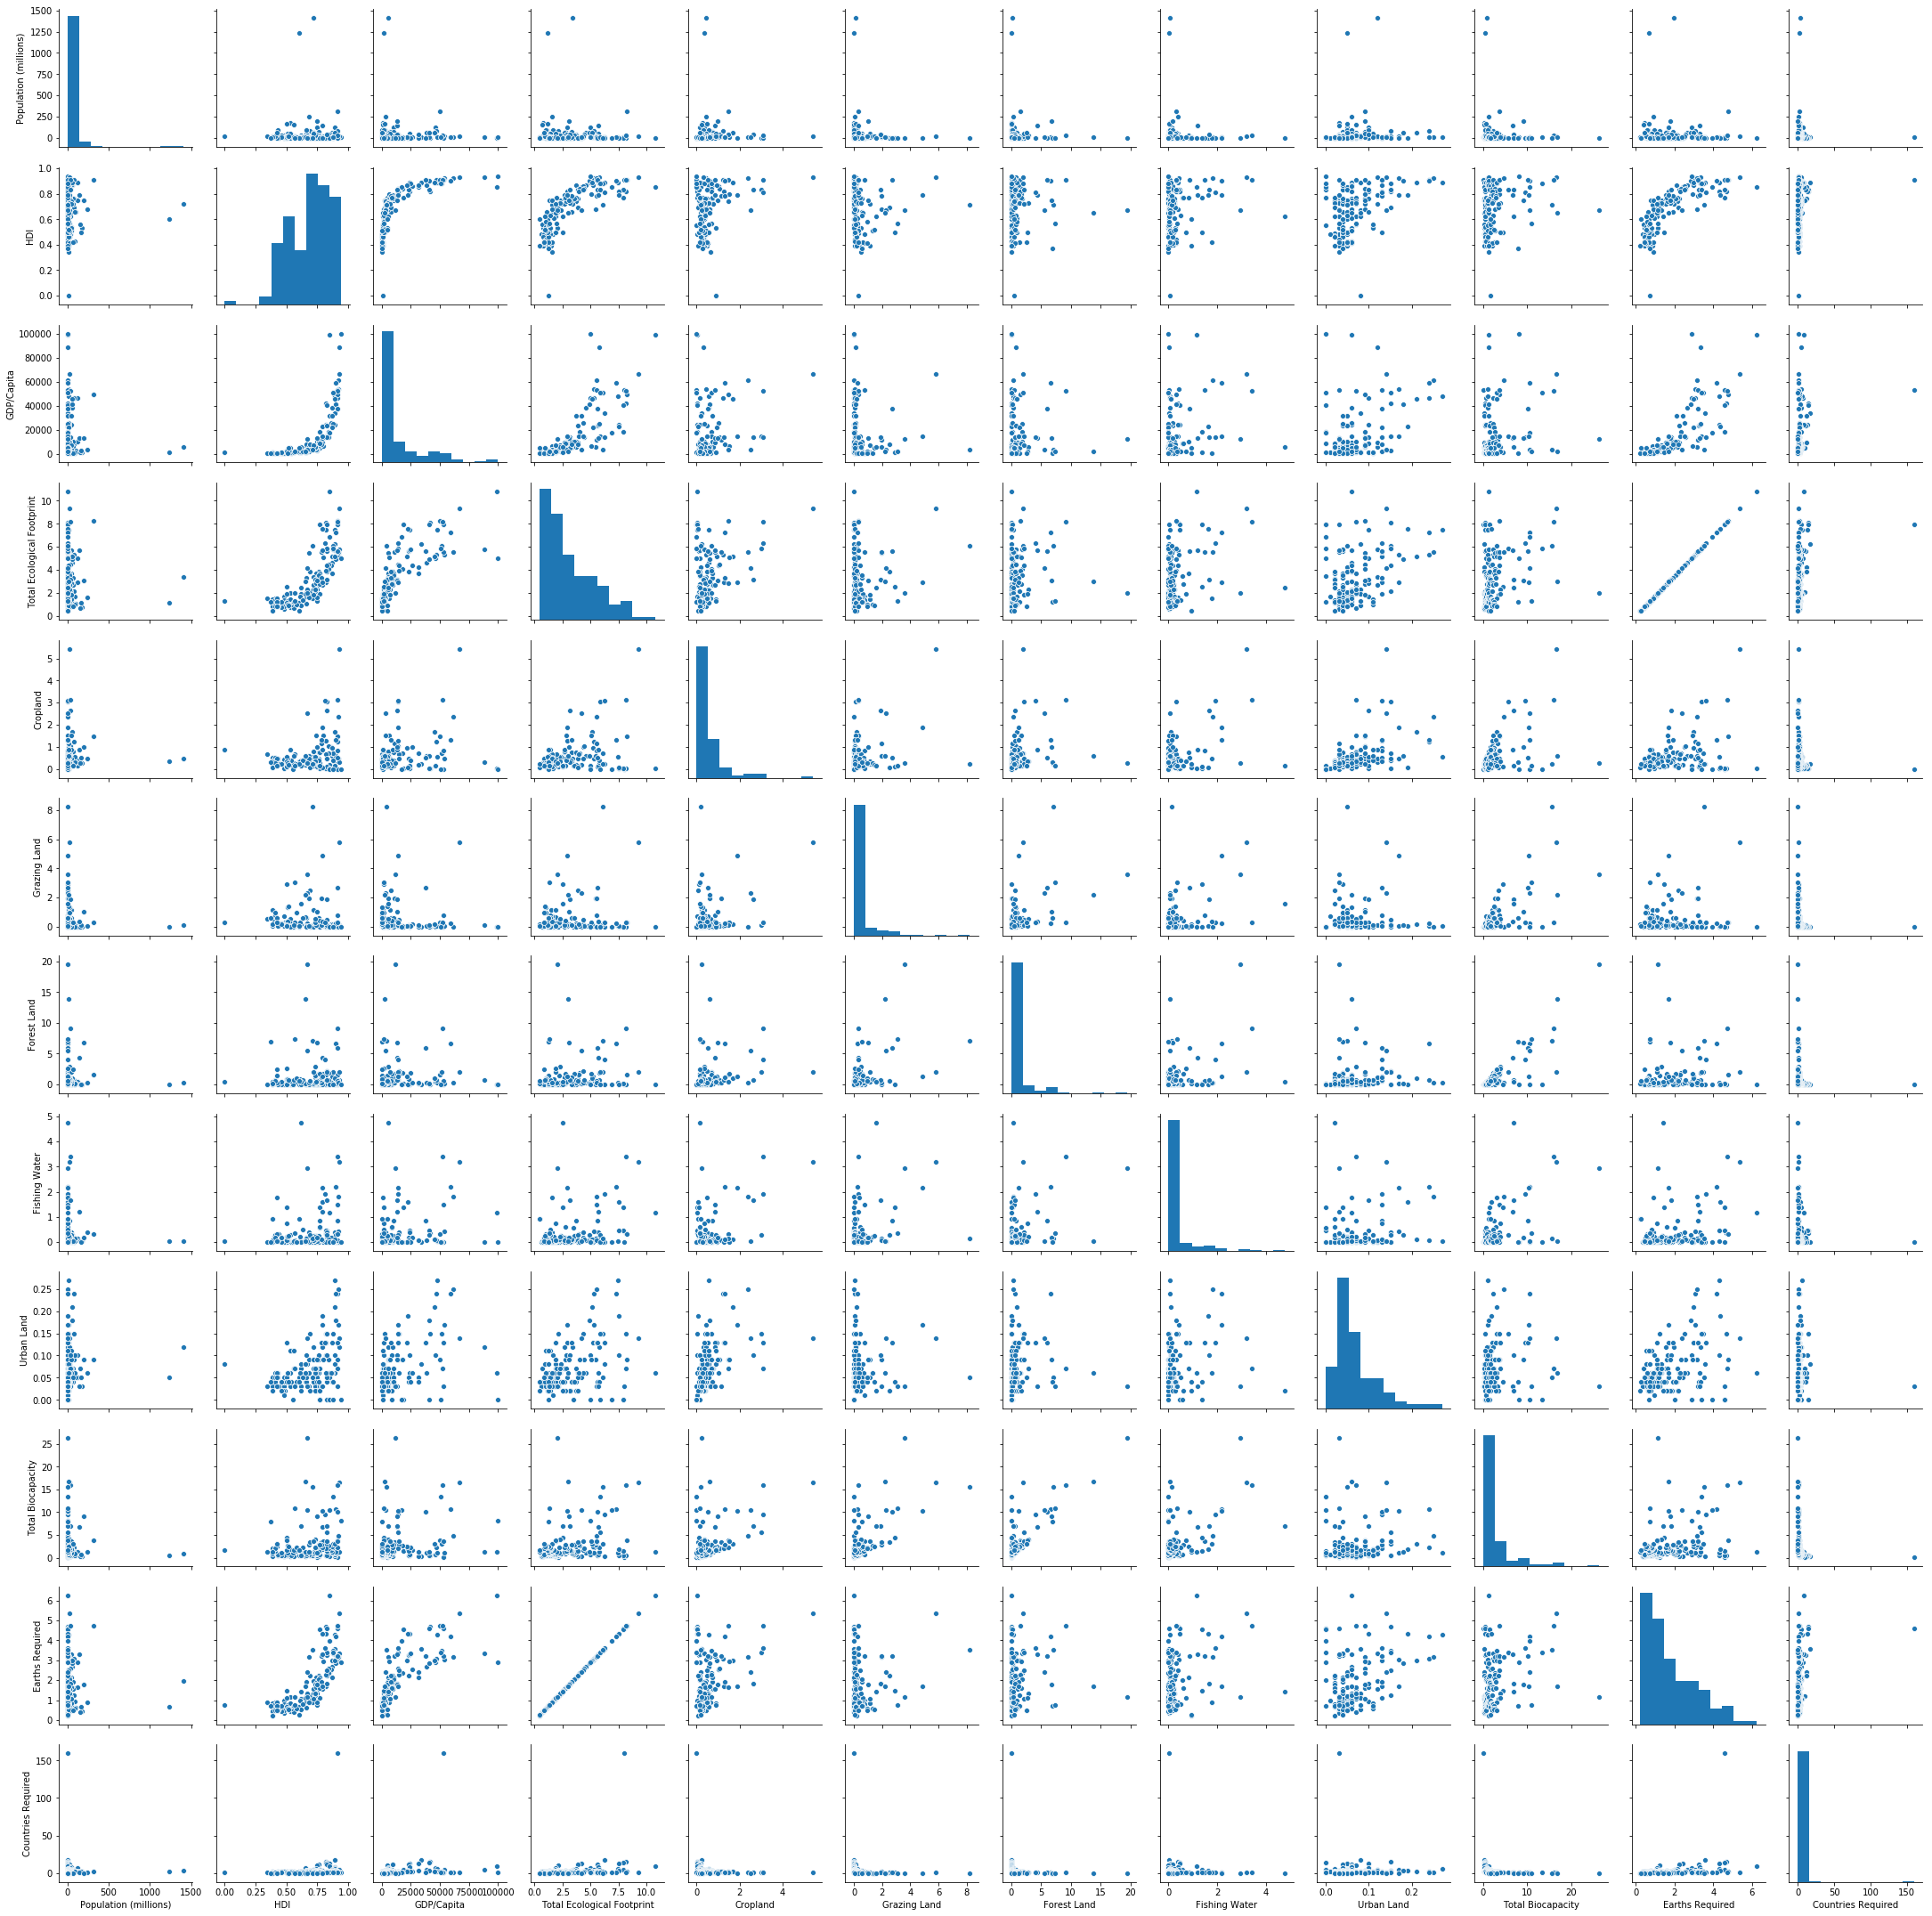

In [6]:
seaborn.pairplot(data)

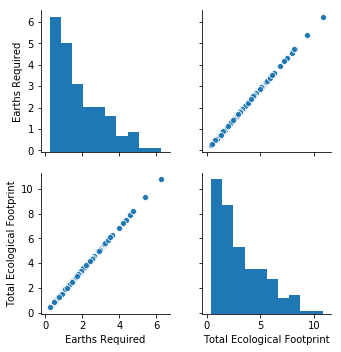

In [7]:
seaborn.pairplot(data[["Earths Required", "Total Ecological Footprint"]])

<font size="+1" color="RED">**[Q]**</font> Que pensez-vous de la corrélation entre la variable "Total Ecological Footprint" et la variable "Earths Required"?

Les points tracés s'alignent sur une droite croissante : ces deux variables sont donc fortément correlées, leur coefficient de correlation doit être proche de 1.

### Expérimentations

<font size="+1" color="RED">**[Q]**</font> A partir de <code>data</code>, proposer et tester un classifieur permettant de prédire si le pays est de la région <code>European Union</code> ou non en utilisant la description composée uniquement des variables <code>Population (millions)</code>, <code>HDI</code>, <code>GDP/Capita</code>, <code>Total Ecological Footprint</code>, et <code>Earth Required</code>.

In [8]:
data["is EU"] = 2*(data.Region == "European Union") - 1
data.head(10)

,Country,Region,Population (millions),HDI,GDP/Capita,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Earths Required,Countries Required,is EU
0,Singapore,Asia-Pacific,5.300,0.91,53122.40,7.97,0.00,0.00,0.00,0.01,0.03,0.05,4.61,159.47,-1
1,Israel,Middle East/Central Asia,7.640,0.89,33718.90,6.22,0.22,0.01,0.03,0.02,0.08,0.35,3.59,17.59,-1
2,Kuwait,Middle East/Central Asia,3.250,0.82,41830.50,8.13,0.02,0.01,0.00,0.37,0.15,0.55,4.70,14.68,-1
3,United Arab Emirates,Middle East/Central Asia,9.206,0.83,40817.40,7.93,0.02,0.00,0.07,0.47,0.00,0.56,4.58,14.16,-1
4,Bahrain,Middle East/Central Asia,1.320,0.82,24299.00,7.49,0.01,0.00,0.00,0.46,0.10,0.58,4.33,12.96,-1
5,Cyprus,European Union,1.130,0.85,31454.70,4.21,0.18,0.00,0.06,0.06,0.05,0.34,2.43,12.35,1
6,Lebanon,Middle East/Central Asia,4.650,0.76,9143.86,3.84,0.16,0.04,0.06,0.01,0.06,0.33,2.22,11.70,-1
7,Saudi Arabia,Middle East/Central Asia,28.290,0.83,23593.80,5.61,0.09,0.12,0.07,0.18,0.04,0.50,3.24,11.28,-1
8,Jordan,Middle East/Central Asia,7.010,0.75,4615.17,2.10,0.09,0.02,0.03,0.00,0.07,0.21,1.21,9.91,-1
9,Qatar,Middle East/Central Asia,2.050,0.85,99431.50,10.80,0.01,0.00,0.00,1.17,0.06,1.24,6.24,8.72,-1


In [9]:
columnsX = ["Population (millions)", "HDI", "GDP/Capita", "Total Ecological Footprint", "Earths Required"]
columnY = ["is EU"]
labSet = ls.LabeledSet(len(columnsX))
labSet.x = (data[columnsX].values - data[columnsX].mean().values)/data[columnsX].std().values
labSet.y = data[columnY].values.reshape(-1, 1)
labSet.nb_examples = labSet.y.shape[0]

labSetLearn, labSetTest = ut.split(labSet, p_train = 0.85)

print("Proportion de pays de l'EU dans la base de données : {:.2f}%"\
      .format(100*(labSet.y==1).sum()/labSet.nb_examples))

Proportion de pays de l'EU dans la base de données : 16.78%


In [10]:
labSet.affiche_base()

Exemple 0
	description :  [-0.26362245  1.3324416   1.96174355  2.16880572  2.17394805]
	label :  [-1]
Exemple 1
	description :  [-0.2487048   1.2156438   0.99127515  1.37868083  1.37669737]
	label :  [-1]
Exemple 2
	description :  [-0.27669134  0.8068515   1.39697781  2.24104571  2.2442937 ]
	label :  [-1]
Exemple 3
	description :  [-0.23872145  0.8652504   1.34630749  2.15074572  2.1504995 ]
	label :  [-1]
Exemple 4
	description :  [-0.28899521  0.8068515   0.52013772  1.95208575  1.95509492]
	label :  [-1]
Exemple 5
	description :  [-0.29020647  0.9820482   0.87803092  0.47116594  0.47002014]
	label :  [1]
Exemple 6
	description :  [-0.26776624  0.45645811 -0.23784844  0.30411097  0.30588029]
	label :  [-1]
Exemple 7
	description :  [-0.11705971  0.8652504   0.48486705  1.10326586  1.10313097]
	label :  [-1]
Exemple 8
	description :  [-0.25272109  0.39805921 -0.46435142 -0.48149893 -0.4835542 ]
	label :  [-1]
Exemple 9
	description :  [-0.28434141  0.9820482   4.27789878  3.44655055

In [11]:
N= 600

In [12]:
classif = cl.ClassifierGradientSto(len(columnsX), 1e-3)

accuracyLearn = np.zeros(N)
accuracyTest = np.zeros(N)

for i in range(N):
    accuracyLearn[i] = classif.accuracy(labSetLearn)
    accuracyTest[i] = classif.accuracy(labSetTest)
    classif.train(labSetLearn)

In [13]:
print(classif.accuracy(labSetLearn), classif.accuracy(labSetTest))

62.5 71.42857142857143


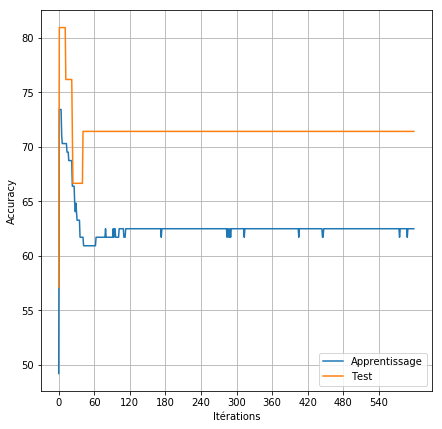

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(accuracyLearn, label="Apprentissage")
ax.plot(accuracyTest, label="Test")
ax.legend(loc="lower right")
ax.set_xlabel("Itérations")
ax.set_xticks(range(0, N, int(N/10)))
ax.set_ylabel("Accuracy")
plt.show()

In [15]:
kernel = ut.KernelPoly()
classif = cl.ClassifierGradientStoKernel(kernel.transform(labSet.x[0]).size, 1e-4, kernel)

accuracyLearn = np.zeros(N)
accuracyTest = np.zeros(N)

for i in range(N):
    accuracyLearn[i] = classif.accuracy(labSetLearn)
    accuracyTest[i] = classif.accuracy(labSetTest)
    classif.train(labSetLearn)

In [16]:
print(classif.accuracy(labSetLearn), classif.accuracy(labSetTest))

80.46875 85.71428571428571


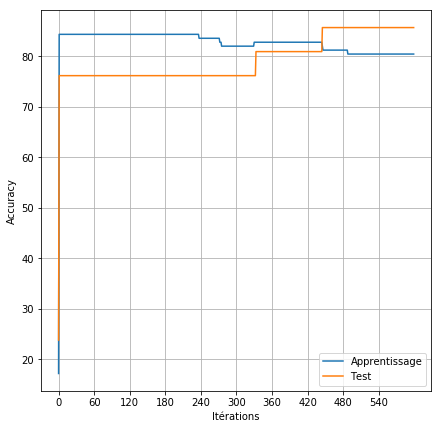

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(accuracyLearn, label="Apprentissage")
ax.plot(accuracyTest, label="Test")
ax.legend(loc="lower right")
ax.set_xlabel("Itérations")
ax.set_xticks(range(0, N, int(N/10)))
ax.set_ylabel("Accuracy")
plt.show()

In [18]:
classif = cl.ClassifierKNN(len(columnsX), 3)
classif.train(labSetLearn)

In [19]:
print(classif.accuracy(labSetLearn), classif.accuracy(labSetTest))

92.96875 90.47619047619048


<font size="+1" color="RED">**[Q]**</font>  La variable <code>Region</code> est une variable catégorielle qui peut être utilisée en description.
En utilisant la méthode *one-hot encoding* vue en cours, remplacer la variable <code>Region</code> afin d'avoir un dataset décrit que par des variables numériques. On appelle <code>data_num</code> le dataset correspondant.


In [20]:
data_num = data.copy()
regions = np.unique(data_num["Region"])

for reg in regions:
    data_num["is " + reg] = 2*(data.Region == reg) - 1

data_num.drop(["Region", "is EU"], axis = 1, inplace = True)

data_num

,Country,Population (millions),HDI,GDP/Capita,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Earths Required,Countries Required,is Africa,is Asia-Pacific,is European Union,is Latin America,is Middle East/Central Asia,is North America,is Northern/Eastern Europe
0,Singapore,5.300,0.91,53122.40,7.97,0.00,0.00,0.00,0.01,0.03,0.05,4.61,159.47,-1,1,-1,-1,-1,-1,-1
1,Israel,7.640,0.89,33718.90,6.22,0.22,0.01,0.03,0.02,0.08,0.35,3.59,17.59,-1,-1,-1,-1,1,-1,-1
2,Kuwait,3.250,0.82,41830.50,8.13,0.02,0.01,0.00,0.37,0.15,0.55,4.70,14.68,-1,-1,-1,-1,1,-1,-1
3,United Arab Emirates,9.206,0.83,40817.40,7.93,0.02,0.00,0.07,0.47,0.00,0.56,4.58,14.16,-1,-1,-1,-1,1,-1,-1
4,Bahrain,1.320,0.82,24299.00,7.49,0.01,0.00,0.00,0.46,0.10,0.58,4.33,12.96,-1,-1,-1,-1,1,-1,-1
5,Cyprus,1.130,0.85,31454.70,4.21,0.18,0.00,0.06,0.06,0.05,0.34,2.43,12.35,-1,-1,1,-1,-1,-1,-1
6,Lebanon,4.650,0.76,9143.86,3.84,0.16,0.04,0.06,0.01,0.06,0.33,2.22,11.70,-1,-1,-1,-1,1,-1,-1
7,Saudi Arabia,28.290,0.83,23593.80,5.61,0.09,0.12,0.07,0.18,0.04,0.50,3.24,11.28,-1,-1,-1,-1,1,-1,-1
8,Jordan,7.010,0.75,4615.17,2.10,0.09,0.02,0.03,0.00,0.07,0.21,1.21,9.91,-1,-1,-1,-1,1,-1,-1
9,Qatar,2.050,0.85,99431.50,10.80,0.01,0.00,0.00,1.17,0.06,1.24,6.24,8.72,-1,-1,-1,-1,1,-1,-1


<font size="+1" color="RED">**[Q]**</font> Appliquer l'algorithme des $k$-moyennes sur <code>data_num</code>  (pensez à ne pas considérer la variable <code>Country</code>). Quelle valeur de $k$ vous semble la plus pertinente ?

In [21]:
# Normalisation:
data_num_norm = km.normalisation(data_num.drop("Country", axis = 1))

In [22]:
# Essai avec k=3:
les_centres, l_affectation = km.kmoyennes(3, data_num_norm, 0.05, 100)

In [23]:
k_max = 15
tab_eval = np.zeros(k_max)

for k in range(k_max):
    if k == 0 or k == 1:
        tab_eval[k] = 1000 + k
    else:
        les_centres, l_affectation = km.kmoyennes(k, data_num_norm, 0.05, 100)
        tab_eval[k] = km.evaluation("Dunn",data_num_norm,les_centres,l_affectation)

print(tab_eval)

[1000.         1001.            2.13053617    2.39514263    1.8373061
    1.75666577    2.03621269    2.00054592    6.92180046    6.85289834
    2.02440288   10.54233459    6.41362598    5.0322275     5.65131711]


In [24]:
best_k = np.argmin(tab_eval)
print(best_k)

5


<font size="+1" color="RED">**[Q]**</font> Construire un nouveau dataset obtenu à partir de <code>data_num</code> en remplaçant la variable <code>Countries Required</code> par une variable catégorielle à 2 valeurs obtenue grâce à l'approche de discrétisation vue dans le cours 11. On appelle <code>data_class</code> ce nouveau dataset.

In [28]:
data_class = data_num.copy()
median = data_class["Countries Required"].median()
data_class["Countries Required cat"] = 2*(data_class["Countries Required"] > median) - 1

data_class

,Country,Population (millions),HDI,GDP/Capita,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,...,Earths Required,Countries Required,is Africa,is Asia-Pacific,is European Union,is Latin America,is Middle East/Central Asia,is North America,is Northern/Eastern Europe,Countries Required cat
0,Singapore,5.300,0.91,53122.40,7.97,0.00,0.00,0.00,0.01,0.03,...,4.61,159.47,-1,1,-1,-1,-1,-1,-1,1
1,Israel,7.640,0.89,33718.90,6.22,0.22,0.01,0.03,0.02,0.08,...,3.59,17.59,-1,-1,-1,-1,1,-1,-1,1
2,Kuwait,3.250,0.82,41830.50,8.13,0.02,0.01,0.00,0.37,0.15,...,4.70,14.68,-1,-1,-1,-1,1,-1,-1,1
3,United Arab Emirates,9.206,0.83,40817.40,7.93,0.02,0.00,0.07,0.47,0.00,...,4.58,14.16,-1,-1,-1,-1,1,-1,-1,1
4,Bahrain,1.320,0.82,24299.00,7.49,0.01,0.00,0.00,0.46,0.10,...,4.33,12.96,-1,-1,-1,-1,1,-1,-1,1
5,Cyprus,1.130,0.85,31454.70,4.21,0.18,0.00,0.06,0.06,0.05,...,2.43,12.35,-1,-1,1,-1,-1,-1,-1,1
6,Lebanon,4.650,0.76,9143.86,3.84,0.16,0.04,0.06,0.01,0.06,...,2.22,11.70,-1,-1,-1,-1,1,-1,-1,1
7,Saudi Arabia,28.290,0.83,23593.80,5.61,0.09,0.12,0.07,0.18,0.04,...,3.24,11.28,-1,-1,-1,-1,1,-1,-1,1
8,Jordan,7.010,0.75,4615.17,2.10,0.09,0.02,0.03,0.00,0.07,...,1.21,9.91,-1,-1,-1,-1,1,-1,-1,1
9,Qatar,2.050,0.85,99431.50,10.80,0.01,0.00,0.00,1.17,0.06,...,6.24,8.72,-1,-1,-1,-1,1,-1,-1,1


<font size="+1" color="RED">**[Q]**</font> Expérimenter 2 algorithmes d'apprentissage supervisé sur <code>data_class</code> (vous réaliserez une validation croisée afin d'obtenir un taux de bonne classification moyen et un écart type). Que pouvez-vous en conclure?

## Préparation pour le projet

Le temps restant de la séance est consacré au projet.